<a href="https://colab.research.google.com/github/get2aakash/DeepLearning_/blob/main/MLP_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [12]:
#load dataset
(x_train, y_train ), (x_test, y_test) = mnist.load_data()
print("x-train",len(x_train))
print("x-test",len(x_test))
print("y-train",len(y_train))
print("y-test",len(y_test))

x-train 60000
x-test 10000
y-train 60000
y-test 10000


In [16]:
# compute the number of labels
num_labels = len(np.unique(y_train))
print (num_labels)

10


In [17]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [31]:
# image dimensions (assumed square)
#The proposed model is based on MLP layers. Therefore, the input is expected to be a 1D tensor. As such, x_train and x_test are reshaped to [60,000, 28 * 28] and [10,000, 28 * 28], respectively.
image_size = x_train.shape[1]
input_size = image_size * image_size

In [19]:
# resize and normalize 
# Although raw pixel values can be used directly, it is better to normalize the input data so as to avoid large gradient values that could make training diffcult. 
#In NumPy, a size of -1 means to let the library compute the correct dimension.
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [20]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [21]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

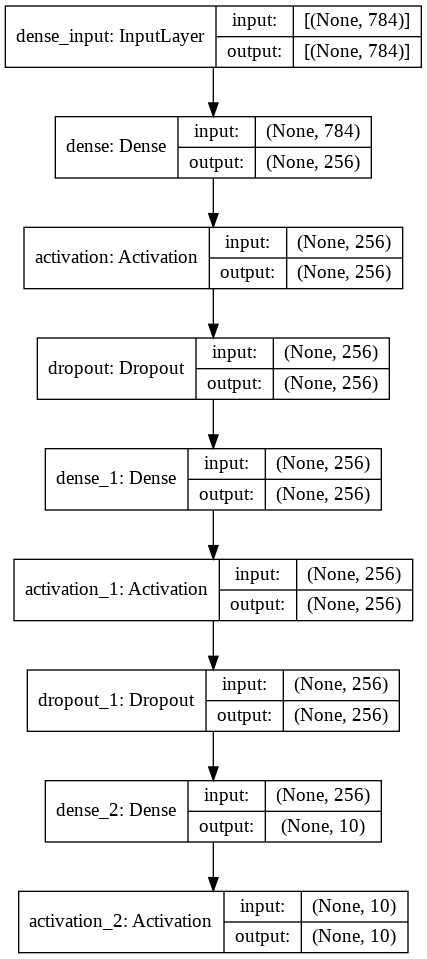

In [22]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)


In [23]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [24]:
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 5s 3ms/step - loss: 0.4219 - accuracy: 0.8705
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1954 - accuracy: 0.9411
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1522 - accuracy: 0.9534
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1294 - accuracy: 0.9612
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1161 - accuracy: 0.9646
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1033 - accuracy: 0.9685
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0953 - accuracy: 0.9706
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0863 - accuracy: 0.9731
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0808 - accuracy: 0.9750
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0780 - accuracy: 0.9748

In [30]:
# validate the model on test dataset to determine generalization
_,acc = model.evaluate(x_test,y_test,batch_size=batch_size,verbose=0)


In [26]:
print("\nTest accuracy: %.1f%%" % (100.0 * acc))



Test accuracy: 98.4%
